In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [102]:
csv = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

In [103]:
df= pd.DataFrame(csv)

In [149]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin
0,1,0,1.0,"Braund, Mr. Owen Harris",0,-0.592148,1,0,0.014151,0.326531
1,2,1,0.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0.638430,1,0,0.139136,0.557823
2,3,1,1.0,"Heikkinen, Miss. Laina",1,-0.284503,0,0,0.015469,0.993197
3,4,1,0.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0.407697,1,0,0.103644,0.380952
4,5,0,1.0,"Allen, Mr. William Henry",0,0.407697,0,0,0.015713,0.000000
...,...,...,...,...,...,...,...,...,...,...
886,887,0,0.5,"Montvila, Rev. Juozas",0,-0.207592,0,0,0.025374,0.000000
887,888,1,0.0,"Graham, Miss. Margaret Edith",1,-0.822881,0,0,0.058556,0.210884
888,889,0,1.0,"Johnston, Miss. Catherine Helen ""Carrie""",1,0.000000,1,2,0.045771,0.000000
889,890,1,0.0,"Behr, Mr. Karl Howell",0,-0.284503,0,0,0.058556,0.414966


# Description of the coulumns
Survived: 1 the passenger did survive, 0 he did not
Pclass: the passanger class: 1 highest, 3 lowest
SibSp: number of siblings the passenger had on the ship
Parch: number of children or parents the passenger had on the ship
Cabin: Cabin name
Fare: Ticket price for the passanger
Embarked: from where the passenger got on the ship

# Description of the Data Types
the dataset contains both categorical (like sex) and numerical (like age)

# Missing Values
not all coulmns have missing values, but perhaps the coulumn with most missing values is Cabin

# Insights Summary
PassengerID: numerical
Survived: numerical
Pclass: numerical
sex: catogerical
Age: numerical (contain missing values)
SibSp: numerical
Parch: numerical
Fare: numerical
Embarked: catogerical (contain missing values)
Cabin: catogerical

# Handling missing data

In [105]:
df["Age"]=df["Age"].fillna(df["Age"].mean())

In [106]:
#I think ticket, and embarked are no necessary for survival prediction
#they don't affect anything in the surviving process
#so I will drop them

In [107]:
df=df.drop("Embarked",axis=1)
df=df.drop("Ticket",axis=1)


In [129]:
#for the Cabin part, I will fill it with the mode


In [110]:
df["Cabin"]=df["Cabin"].fillna(df["Cabin"].mode())

# Encoding for Catogerical Data

In [111]:
df["Sex"]=df["Sex"].replace({"male":0, "female":1})

C:\Users\Mostafa\AppData\Local\Temp\ipykernel_25508\3584742957.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Sex"]=df["Sex"].replace({"male":0, "female":1})


In [113]:
df["Cabin"] = df["Cabin"].astype('category').cat.codes

# Scaling

In [114]:
df["Cabin"] = (df["Cabin"]-df["Cabin"].min())/(df["Cabin"].max()-df["Cabin"].min())
df["Cabin"]=df["Cabin"].astype(float)

In [115]:
#normalizing age

In [116]:
df["Age"] = (df["Age"]-df["Age"].mean())/(df["Age"].std())

In [124]:
df["Fare"] = (df["Fare"]-df["Fare"].min())/(df["Fare"].max()-df["Fare"].min())

In [137]:
df["Pclass"] = (df["Pclass"]-df["Pclass"].min())/(df["Pclass"].max()-df["Pclass"].min())

In [125]:
df.to_csv("titanic_cleaned.csv")


# Feature Engineering

In [150]:
df["FamilySize"]= df["SibSp"]+df["Parch"]

# Visualization

In [118]:
df_uncleaned=pd.DataFrame(pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"))

<Axes: xlabel='Age', ylabel='Count'>

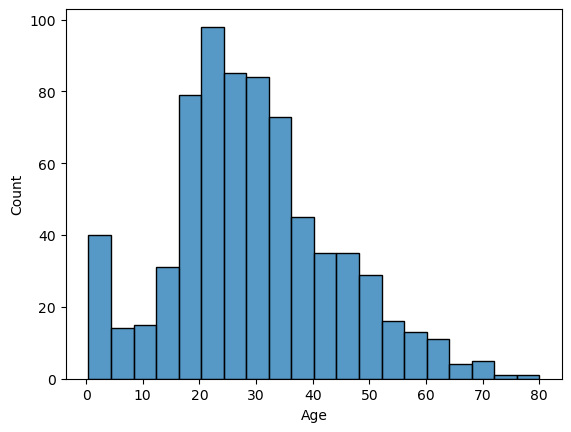

In [119]:
sns.histplot(df_uncleaned['Age'])


<Axes: xlabel='Age', ylabel='Count'>

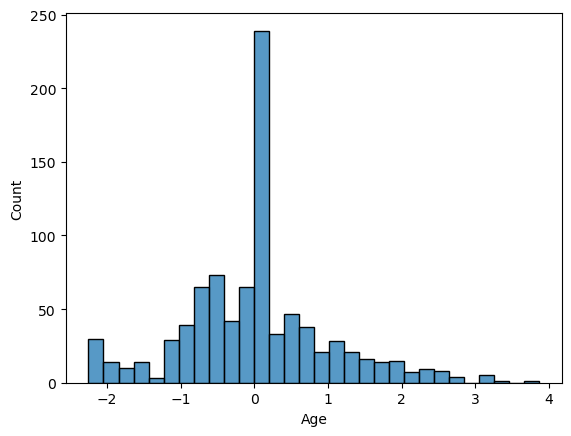

In [120]:
sns.histplot(df['Age'])

<Axes: xlabel='Fare', ylabel='Count'>

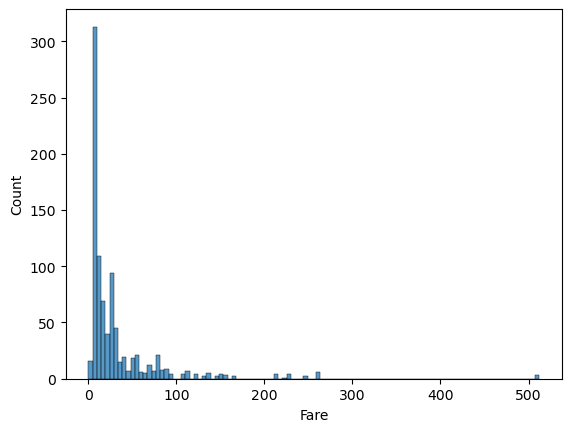

In [126]:
sns.histplot(df_uncleaned['Fare'])

<Axes: xlabel='Fare', ylabel='Count'>

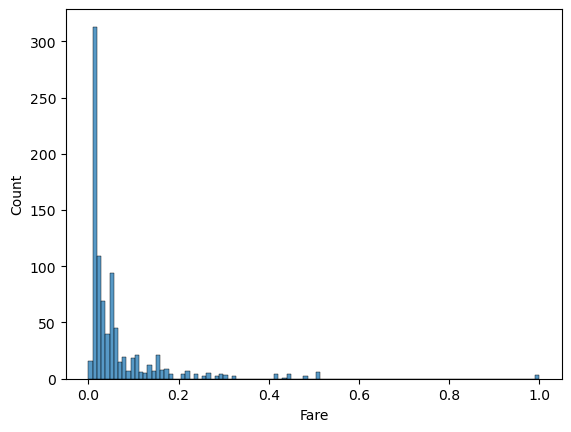

In [127]:
sns.histplot(df['Fare'])

<Axes: xlabel='Sex', ylabel='count'>

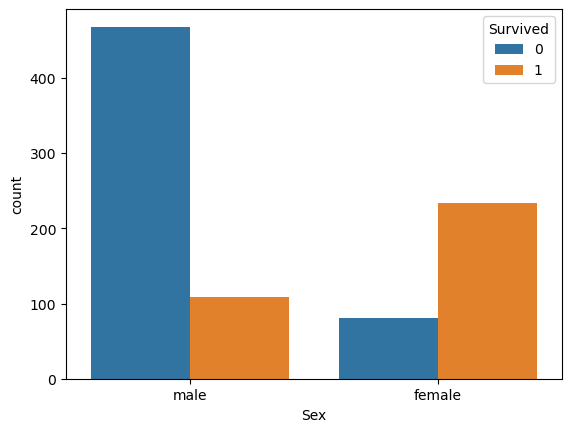

In [130]:
sns.countplot(x="Sex", hue="Survived",data=df_uncleaned)

In [ ]:
#from the above graph we see that females had better chance of surviving
#howvere total females is less than total males

<Axes: xlabel='Sex', ylabel='count'>

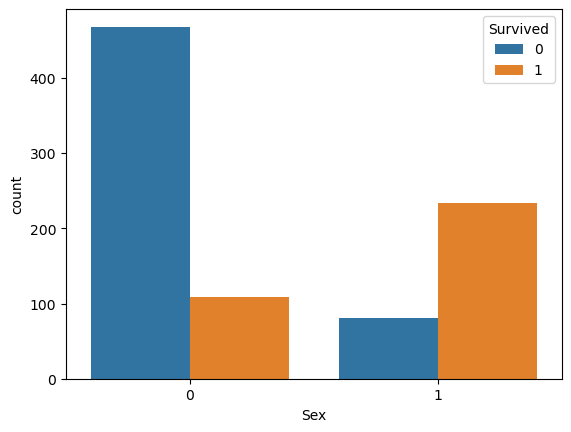

In [131]:
sns.countplot(x="Sex", hue="Survived",data=df)

In [ ]:
# the same

<Axes: xlabel='Pclass', ylabel='count'>

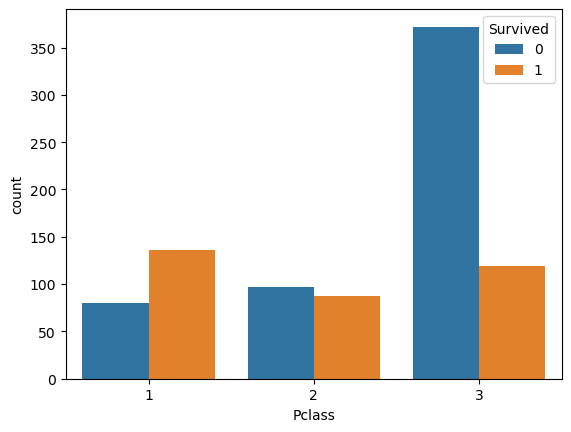

In [152]:
sns.countplot(x="Pclass", hue="Survived",data=df_uncleaned)

In [ ]:
#from the above graph, we see that highest class had the best chance of surviving
#while the lowest class had the worst chance of survival

<Axes: xlabel='Sex', ylabel='count'>

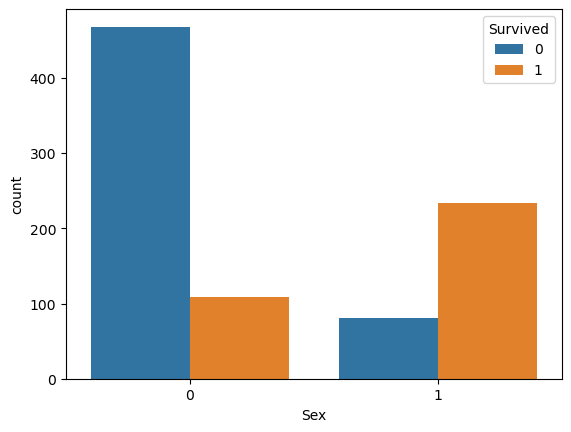

In [153]:
sns.countplot(x="Sex", hue="Survived",data=df)

<Axes: xlabel='Pclass', ylabel='count'>

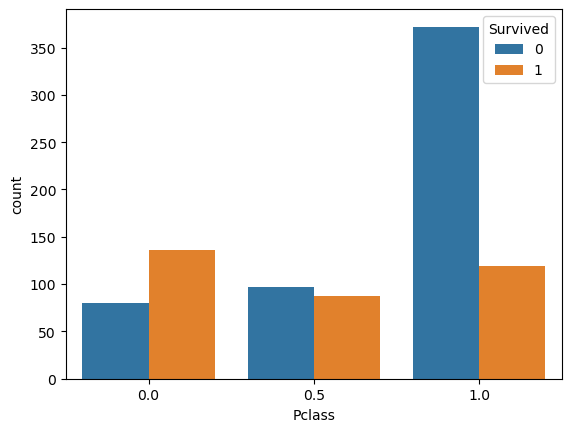

In [148]:
sns.countplot(x="Pclass", hue="Survived",data=df)

<Axes: xlabel='Survived', ylabel='Age'>

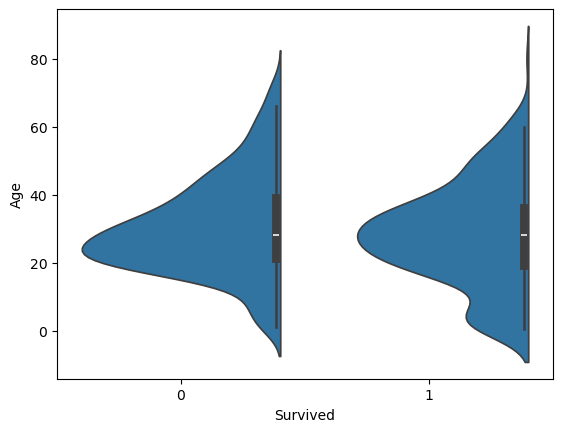

In [164]:
sns.violinplot(x="Survived", y="Age", data=df_uncleaned,split=True)

In [ ]:
#from the above graph we see age has no major effect on the survival

<Axes: xlabel='Survived', ylabel='Age'>

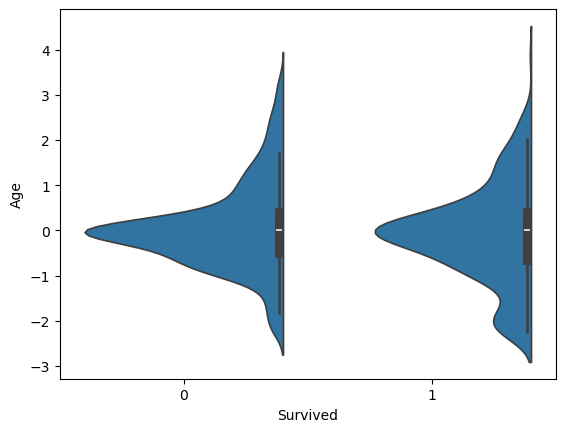

In [165]:
sns.violinplot(x="Survived", y="Age", data=df,split=True)

In [ ]:
#the graph now is kind of clearer to prove that age has no clear effect

<Axes: xlabel='Survived', ylabel='Fare'>

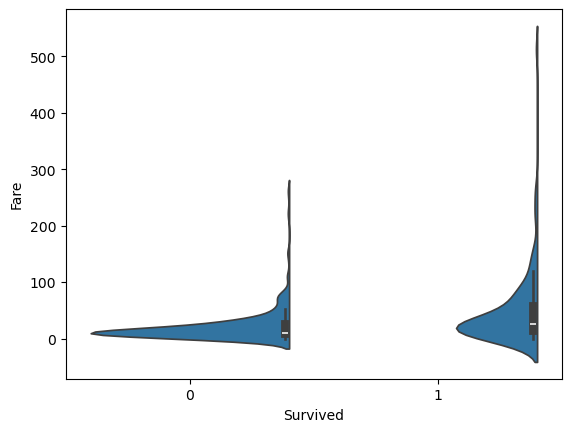

In [166]:
sns.violinplot(x="Survived", y="Fare", data=df_uncleaned,split=True)

In [ ]:
#fare has no relation

<Axes: xlabel='Survived', ylabel='Fare'>

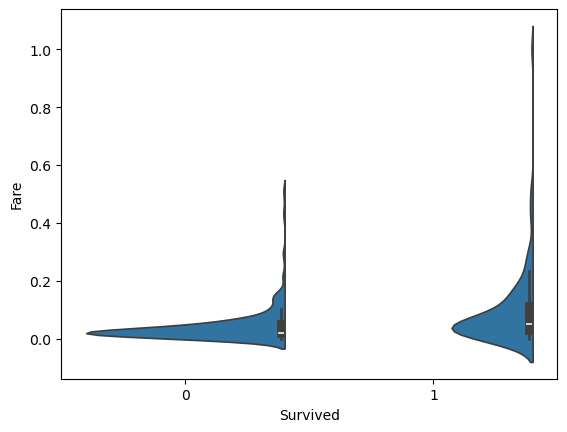

In [168]:
sns.violinplot(x="Survived", y="Fare", data=df,split=True)

In [ ]:
#fare has no relation

<Axes: xlabel='Sex', ylabel='Fare'>

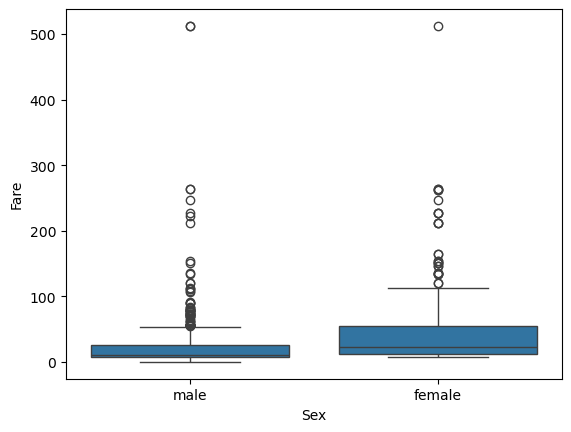

In [179]:
sns.boxplot(x="Sex", y="Fare", data=df_uncleaned)

<Axes: xlabel='Sex', ylabel='Fare'>

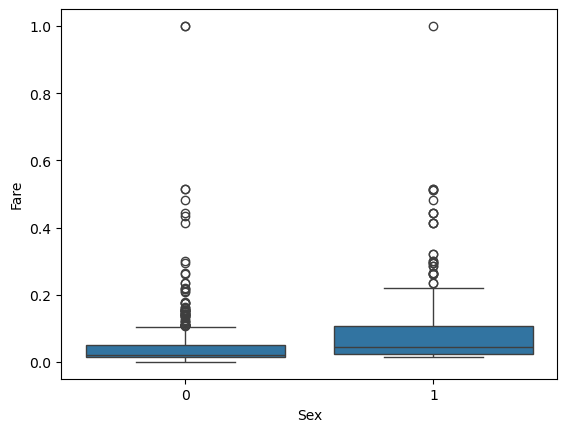

In [180]:
sns.boxplot(x="Sex", y="Fare", data=df)

<Axes: xlabel='Age', ylabel='Count'>

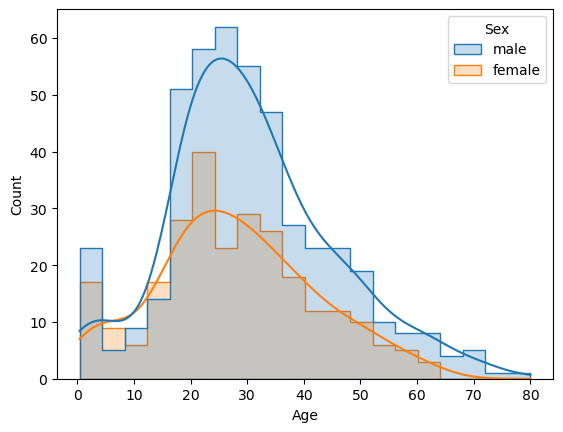

In [182]:
sns.histplot(data=df_uncleaned, x="Age", hue="Sex", kde=True, element="step")

<Axes: xlabel='Age', ylabel='Count'>

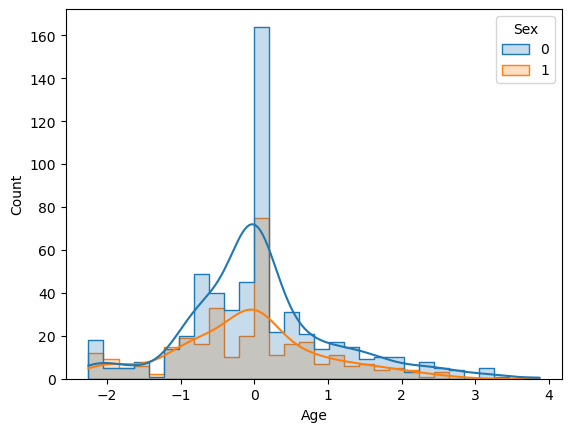

In [183]:
sns.histplot(data=df, x="Age", hue="Sex", kde=True, element="step")

# conclusion

Sex and Pclass have the strongest effect on survival chance, others have minor effects